In [1]:
from imports import *
import staircase as sc
%matplotlib inline
import operator
import warnings
from hotstepper.Utils import Utils
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"../data/hotel_stays.csv", parse_dates=['check_in', 'check_out'], dayfirst=True)

#df = df_cc.loc[df_cc.call_type == 'Type 1']

df.shape

(13602, 6)

In [ ]:
df[['check_in', 'check_out']].to_numpy()

In [3]:
#%%timeit -r 3 -n 3
hotel_stays = Steps.read_dataframe(df,'check_in', 'check_out')
#aborted_type1 = Steps.read_dataframe(df,'arrived','aborted')
#duration_type1 = Steps.read_dataframe(df,'answered','complete')

In [ ]:
hotel_stays([pd.Timestamp(2016,4,1)])

In [ ]:
queue = sc.Stairs(use_dates=True).layer(df.check_in, df.check_out)

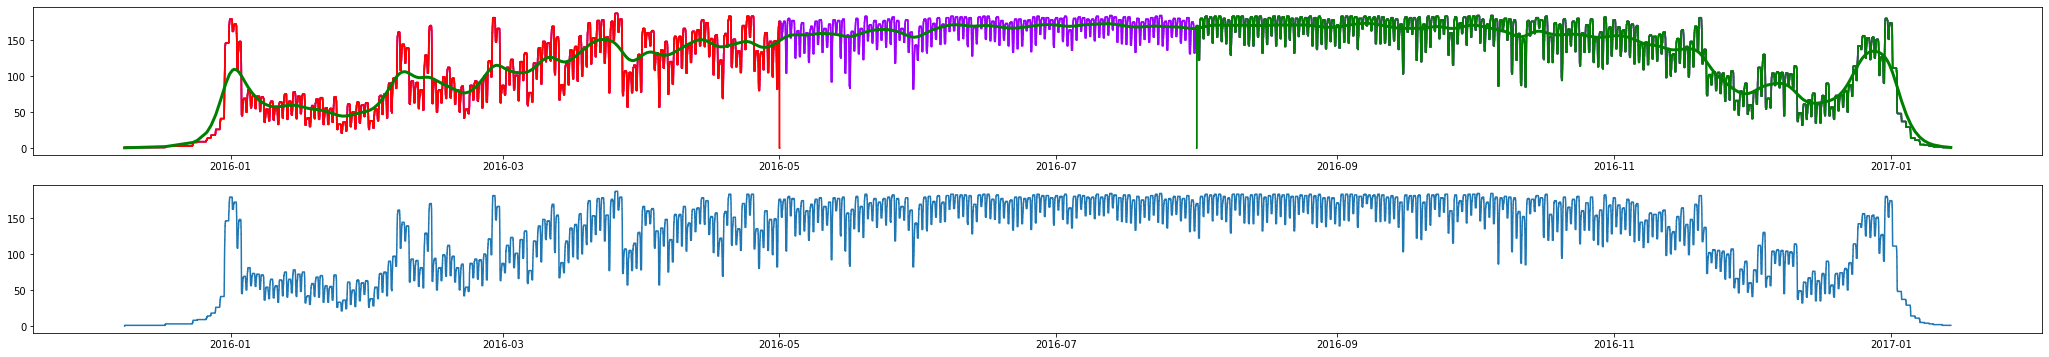

In [4]:
st = np.array([[s._start_ts,s._direction,s._weight] for s in hotel_stays],dtype=float)
p = hotel_stays.step_keys()
fig, ax = plt.subplots(nrows=2,figsize=(36,6))

hotel_stays.plot(ax=ax[0])
hotel_stays.clip(ubound=pd.Timestamp(2016,5,1)).plot(ax=ax[0],color='r')
hotel_stays.clip(lbound=pd.Timestamp(2016,8,1)).plot(ax=ax[0],color='g')
hotel_stays.smooth_plot(ax=ax[0],color='g',linewidth=3)
ax[1].step(p,hotel_stays.fast_step(p))

In [ ]:
d = pd.Timestamp(2016,9,3)

print(hotel_stays(d),hotel_stays.fast_step([d]))

<AxesSubplot:>

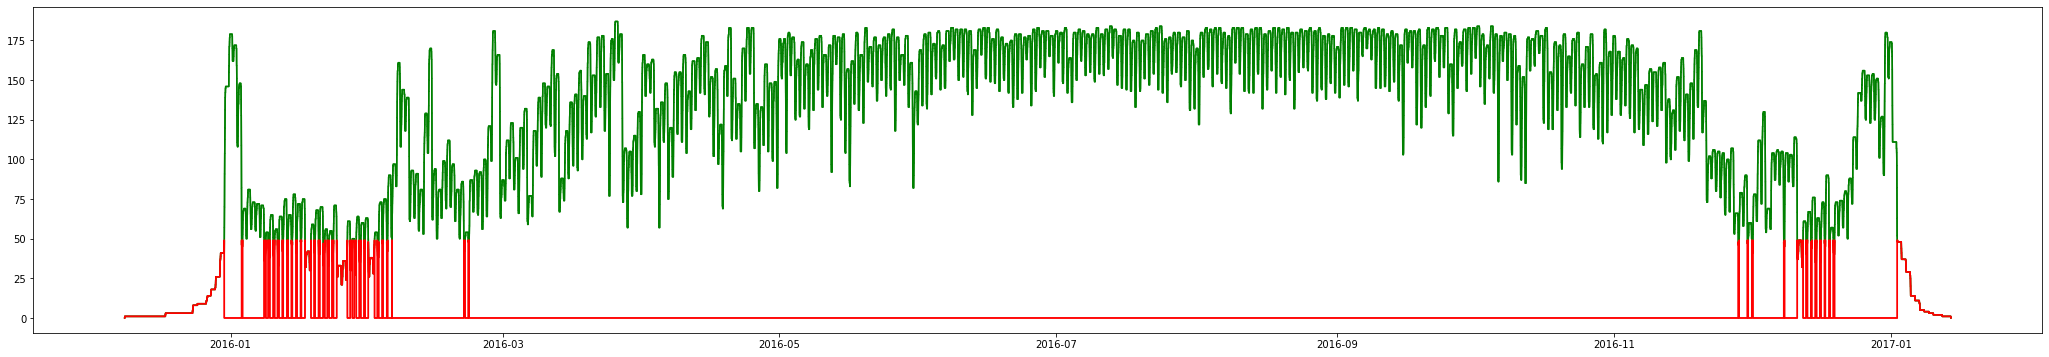

In [5]:
timespan = {'lbound':pd.Timestamp(2020,2,15,10),'ubound':pd.Timestamp(2020,2,16)}
ax = hotel_stays.plot(color='g',size=(36,6))
hotel125 = (hotel_stays<50)
hotel125.plot(ax=ax,color='r')

In [ ]:
#p = hotel_stays.step_keys()
p=np.arange(pd.Timestamp(2016,1,1),pd.Timestamp(2017,1,1),pd.Timedelta(minutes=10)).astype(pd.Timestamp)

In [ ]:
%%timeit -r 3 -n 3
hotel_stays.fast_step(p)

In [ ]:
%%timeit -r 3 -n 3
hotel_stays.fast_step2(p)

In [ ]:
%%timeit -r 3 -n 3
st = np.array(hotel_stays._step_np[:,[1,2,3]],dtype=float)
t = np.array(list(map(Utils.get_ts, p)),dtype=float)
x = Bases.ffheaviside(t,st,1.0)

In [ ]:
%%timeit -r 3 -n 3
st = np.array(hotel_stays._step_np[:,[1,2,3]],dtype=float)
t = np.array(list(map(Utils.get_ts, p)),dtype=float)
x = Bases.fflogit(t,st,250000)

In [ ]:
%%timeit -r 3 -n 3
queue(p)

In [ ]:
queue.percentile(37)

In [ ]:
hotel_stays.histogram_plot()

In [ ]:
hotel_stays.percentile(37)